In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

We have several techniques we can use to visually determine whether this might be modeled as Gaussian. Let's focus on two:

1. Plotting the density

2. A probility plot

Here is the density for one Rice random variable:

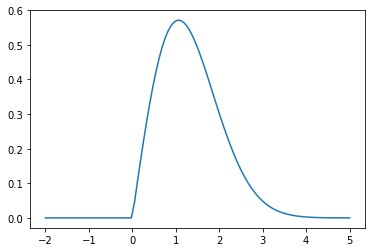

In [2]:
R=stats.rice(0.5)

x=np.linspace(-2,5,100)
plt.plot(x,R.pdf(x))

Here is the density for various sums of Rice random variables:

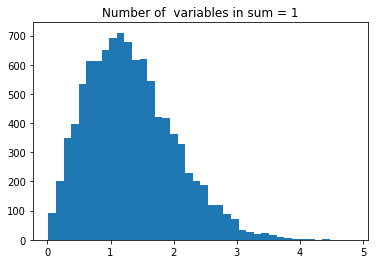

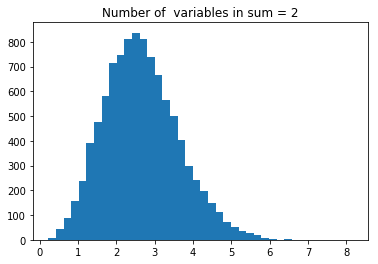

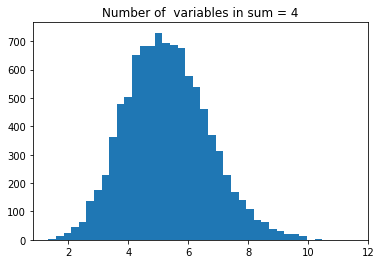

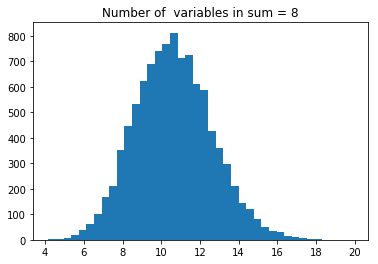

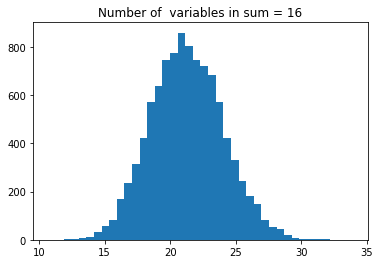

In [3]:
num_sims=10000
for n in range(5):
    R=stats.rice(0.5)
    r=R.rvs(size=(2**n,num_sims))
    plt.figure()
    plt.hist(np.sum(r, axis=0),bins=40)
    plt.title('Number of  variables in sum = '+str(2**n))


The distribution is not very symmetric when there are fewer than 8 variables in the summation. Between 8 and 16 is sufficient.

Let's check the probability plots:

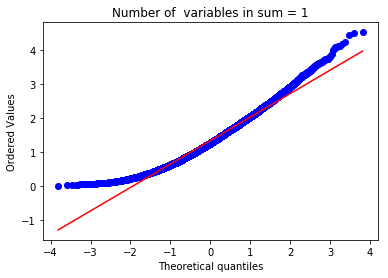

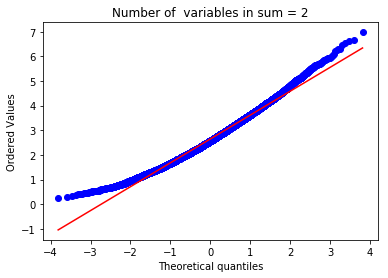

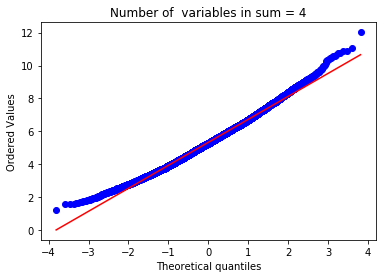

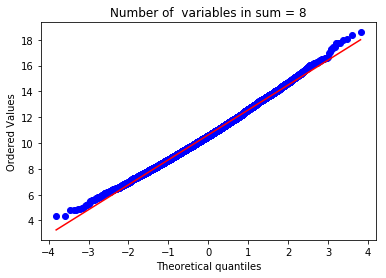

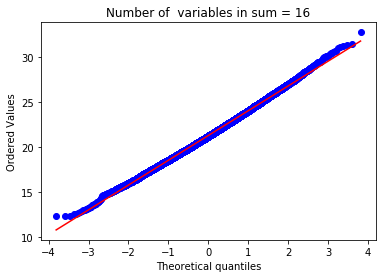

In [4]:
num_sims=10000
for n in range(5):
    R=stats.rice(0.5)
    r=R.rvs(size=(2**n,num_sims))
    plt.figure()
    stats.probplot(np.sum(r,axis=0),plot=plt)
    plt.title('Number of  variables in sum = '+str(2**n))


Again, between 8 and 16 gives a relatively straight line. Let's check the $R^2$ value for 8:

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([ 4.00155545,  4.43525409,  4.65993055, ..., 17.6539848 ,
         17.6640668 , 17.7521456 ])),
 (1.944897643367895, 10.641003238906679, 0.9987229740723104))

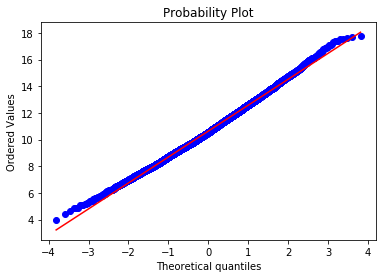

In [5]:
R=stats.rice(0.5)
r=R.rvs(size=(8,num_sims))
plt.figure()
stats.probplot(np.sum(r,axis=0),plot=plt)

In [6]:
0.99876**2

0.9975215376

The $R^2$ value for summing 8 of these Rice RVs is already >0.997, so 8 is probably sufficient. Let's check 4:

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([ 1.18772617,  1.33336251,  1.34837495, ..., 11.09343644,
         11.27510558, 11.37985855])),
 (1.367501746008616, 5.314813119224377, 0.9972553551695658))

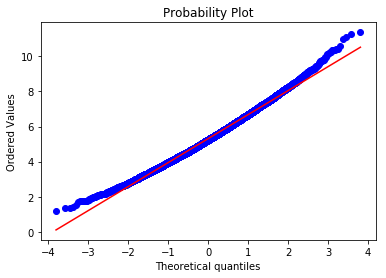

In [7]:
R=stats.rice(0.5)
r=R.rvs(size=(4,num_sims))
plt.figure()
stats.probplot(np.sum(r,axis=0),plot=plt)

In [8]:
0.99767**2

0.9953454288999999

Still, the $R^2$ value is greater than 0.995, but the match isn't as good at the tails.

I would say the best answer is around 10, but other answers are acceptable *as long as they are properly justified*